# [Fatal Accidental Overdoses](https://data.wprdc.org/dataset/allegheny-county-fatal-accidental-overdoses/resource/1c59b26a-1684-4bfb-92f7-205b947530cf)

**Fatal Overdoses as a Metric**





In [31]:
import pandas as pd
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt
import fpsnippets as fps

HOODS = gp.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")["hood"]
od_csv = "https://data.wprdc.org/dataset/allegheny-county-fatal-accidental-overdoses/resource/1c59b26a-1684-4bfb-92f7-205b947530cf/download/1c59b26a-1684-4bfb-92f7-205b947530cf.csv"
od_data = pd.read_csv(od_csv)


In [12]:
od_dict = {}
zip_dict = {}
for hood in HOODS: 
    od_dict[hood.title()] = 0

for index, row in od_data.iterrows(): 
    try: 
        zip = int(row["incident_zip"])
    except: 
        continue
    try:
        hoods = zip_dict[zip]
    except: 
        hoods = fps.zip_to_neighborhoods(zip)
        zip_dict[zip] = hoods
    if hoods != None:
        for hood in hoods: 
            if hood != None: 
                try: 
                    od_dict[hood.title()] += 1
                except: 
                    od_dict[hood.title()] = 1


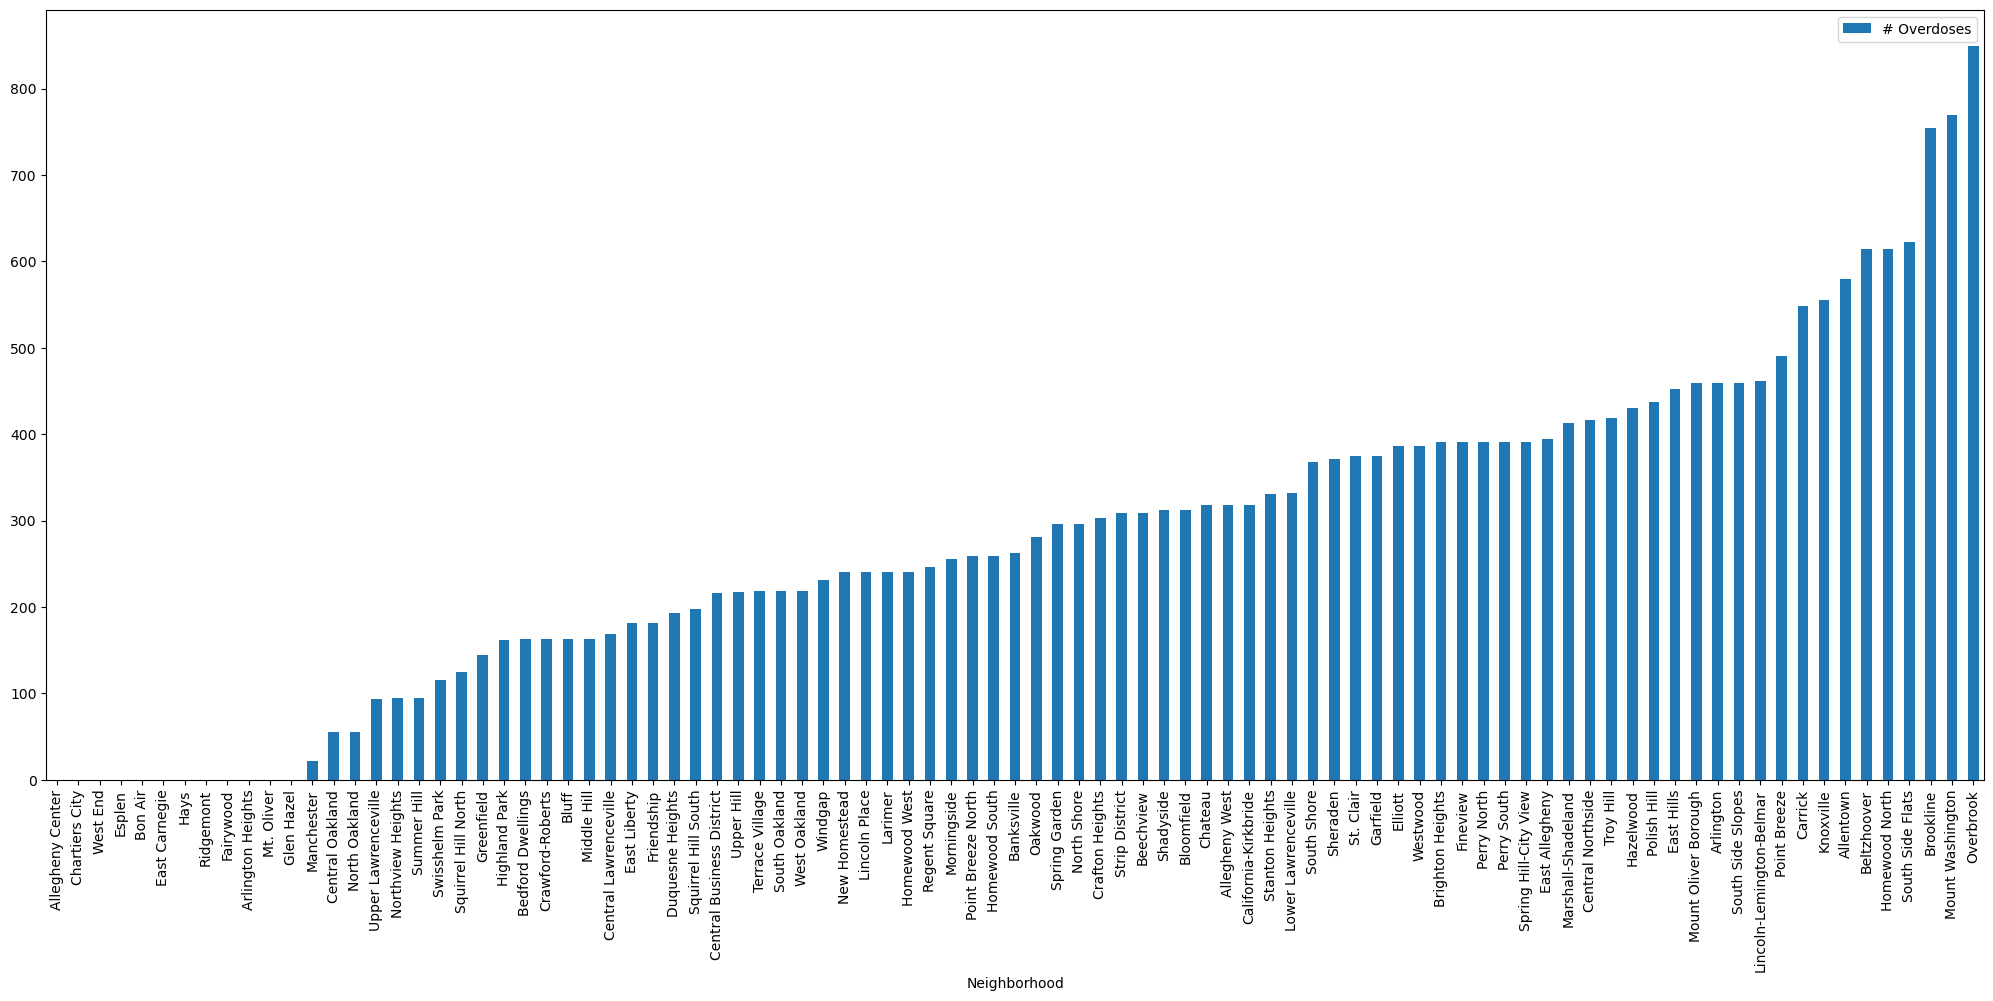

In [44]:
od_df = pd.DataFrame([od_dict.keys(), od_dict.values()]).T
od_df.columns= ['Neighborhood', '# Overdoses']
od_df.head(20)

sorted_ods = od_df.sort_values(by='# Overdoses', ascending=True)
sorted_ods.head(15)

sorted_ods.plot.bar(x="Neighborhood",y="# Overdoses",width = .5, figsize=(25,10))
plt.show()

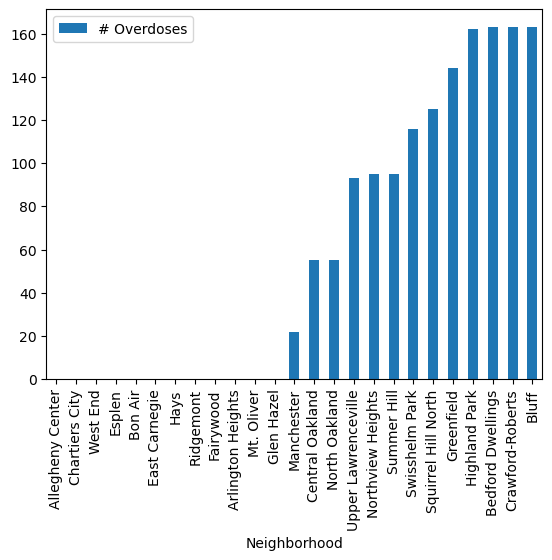

In [49]:
lowest_ods = sorted_ods[:25]
lowest_ods.plot.bar(x="Neighborhood",y="# Overdoses")
plt.show()

In [50]:
lowest_ods.head(13)

,Neighborhood,# Overdoses
45,Allegheny Center,0
50,Chartiers City,0
57,West End,0
58,Esplen,0
31,Bon Air,0
28,East Carnegie,0
25,Hays,0
64,Ridgemont,0
23,Fairywood,0
18,Arlington Heights,0


Best Neighborhoods: 
* Allegheny Center
* Arlington Heights
* Bon Air
* Chartiers City
* East Carnegie
* Esplen
* Fairywood
* Glen Hazel
* Hays
* Mt. Oliver
* Ridgemont
* West End
  